In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load data




In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohitkumar282/used-car-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'used-car-dataset' dataset.
Path to dataset files: /kaggle/input/used-car-dataset


view dataset


In [6]:
df=pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [7]:
df.tail()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"
9581,Hyundai,New i20,2021,3,"83,228 km",Manual,second,Petrol,Nov-24,"Hyundai New i20 1.2 Asta IVT, 2021, Petrol","₹ 6,99,000"


In [8]:
df.sample(3)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
4002,Mahindra,Xylo,2011,13,105000.0 km,Manual,second,Diesel,Nov-24,"Mahindra Xylo 2009-2011 E8 ABS BS IV, 2011, Di...","₹ 5,50,000"
2284,BMW,5 Series,2016,8,"47,000 km",Automatic,second,Diesel,Nov-24,"BMW 5 Series 3.0 530D M Sport, 2016, Diesel","₹ 25,00,000"
5854,Maruti Suzuki,Wagon-R-Stingray,2014,10,"50,000 km",Automatic,second,Hybrid/CNG,Nov-24,Maruti Suzuki Wagon R Stingray 2014,"₹ 3,00,000"


inspect sructure


In [9]:
df.shape


(9582, 11)

In [10]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [12]:
df.dtypes

,0
Brand,object
model,object
Year,int64
Age,int64
kmDriven,object
Transmission,object
Owner,object
FuelType,object
PostedDate,object
AdditionInfo,object


In [13]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000




Handling Missing Data




In [14]:
df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


handling duplicates


In [15]:
df.duplicated().sum()

np.int64(724)

In [16]:
df[df.duplicated()]

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
146,Audi,A3,2015,9,"42,000 km",Automatic,second,Diesel,Nov-24,"Audi A3 2.0 35 TDI Attraction, 2015, Diesel","₹ 10,50,000"
152,Honda,City,2016,8,"93,000 km",Automatic,second,Petrol,Nov-24,Honda City 2016 Petrol Good Condition,"₹ 5,75,000"
199,Audi,A3,2015,9,"42,000 km",Automatic,second,Diesel,Nov-24,"Audi A3 2.0 35 TDI Attraction, 2015, Diesel","₹ 10,50,000"
221,Toyota,Camry,2015,9,"68,000 km",Automatic,second,Petrol,Nov-24,"Toyota Camry 2012-2014 Hybrid, 2015, Petrol","₹ 11,85,000"
230,Mercedes-Benz,GLE COUPE,2021,3,"32,000 km",Automatic,second,Petrol,Oct-24,Mercedes-Benz GLE COUPE 3.0 53 AMG 4MATIC Plus...,"₹ 1,18,00,000"
...,...,...,...,...,...,...,...,...,...,...,...
9510,BMW,X1,2020,4,"45,000 km",Automatic,first,Petrol,Nov-24,"BMW X1 2.0 sDrive20i SportX, 2020, Petrol","₹ 37,00,000"
9518,Volkswagen,VentoTest,2014,10,"72,900 km",Automatic,second,Diesel,Nov-24,Vento Diesel Automatic,"₹ 5,11,000"
9540,Maruti Suzuki,Celerio-X,2020,4,"142,000 km",Automatic,second,Hybrid/CNG,Nov-24,Maruti Suzuki Celerio X 2020 सीएनजी और अन्य 14...,"₹ 3,20,000"
9542,Maruti Suzuki,Celerio,2015,9,103000.0 km,Automatic,second,Petrol,Nov-24,"Maruti Suzuki Celerio 2014-2017 VXI AT, 2015, ...","₹ 3,60,000"


In [17]:
df.drop_duplicates(inplace=True)
df


,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


In [18]:
df = df.drop(["AdditionInfo", "PostedDate", "Year"], axis=1)


In [19]:
df

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,23,"98,000 km",Manual,second,Petrol,"₹ 1,95,000"
1,Toyota,Innova,15,190000.0 km,Manual,second,Diesel,"₹ 3,75,000"
2,Volkswagen,VentoTest,14,"77,246 km",Manual,first,Diesel,"₹ 1,84,999"
3,Maruti Suzuki,Swift,7,"83,500 km",Manual,second,Diesel,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,5,"45,000 km",Automatic,first,Petrol,"₹ 6,85,000"
...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,10,"105,904 km",Automatic,second,Diesel,"₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,4,"55,000 km",Manual,first,Hybrid/CNG,"₹ 3,75,000"
9579,Maruti Suzuki,Ritz,11,"92,000 km",Manual,first,Diesel,"₹ 4,15,000"
9580,Hyundai,Verna,5,"72,000 km",Automatic,first,Petrol,"₹ 8,55,000"


In [20]:
df["Brand"].value_counts().reset_index()


,Brand,count
0,Maruti Suzuki,2590
1,Hyundai,1437
2,Honda,730
3,Toyota,723
4,Mahindra,545
5,Tata,372
6,Mercedes-Benz,347
7,Volkswagen,278
8,BMW,256
9,Ford,231


In [21]:
df["model"].value_counts().reset_index()


,model,count
0,City,306
1,Wagon-R,304
2,Swift,270
3,Ertiga,240
4,Creta,233
...,...,...
395,AMG A35,1
396,Vista Tech,1
397,Captiva,1
398,A3 Cabriolet,1


In [22]:
df["Transmission"].unique()


array(['Manual', 'Automatic'], dtype=object)

In [23]:
df["Owner"].unique()


array(['second', 'first'], dtype=object)

In [24]:
df["FuelType"].unique()


array(['Petrol', 'Diesel', 'Hybrid/CNG'], dtype=object)

cateorical data to numerical

In [25]:
owner_map = {
    "first": 1,
    "second": 2,
    "third": 3,
    "fourth": 4
}

df["Owner"] = df["Owner"].map(owner_map)


In [26]:
df["Owner"]

,Owner
0,2
1,2
2,1
3,2
4,1
...,...
9577,2
9578,1
9579,1
9580,1


In [27]:
df["Transmission"] = df["Transmission"].map({
    "Manual": 0,
    "Automatic": 1
})



In [28]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)


In [29]:
df = pd.get_dummies(
    df,
    columns=["FuelType"],

)

In [30]:
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(" km", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [31]:
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(int)
)

independent and depend variables


In [32]:
y = df["AskPrice"]
x=df.drop("AskPrice",axis=1)

visualization

In [33]:
X=df["Age"]
Y= df["AskPrice"]

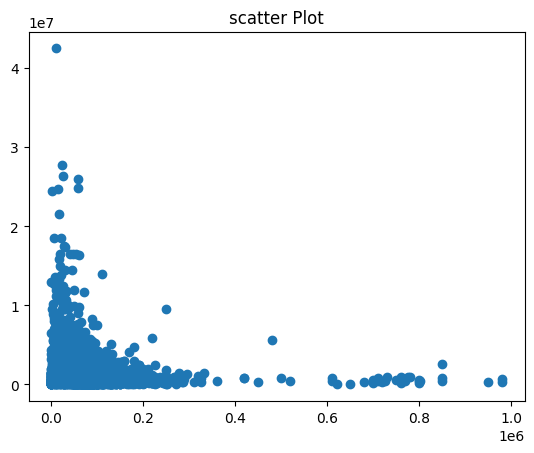

In [34]:
# Line plot

X=df["kmDriven"]
Y= df["AskPrice"]
plt.scatter(X, Y)
plt.title("scatter Plot")
plt.show()

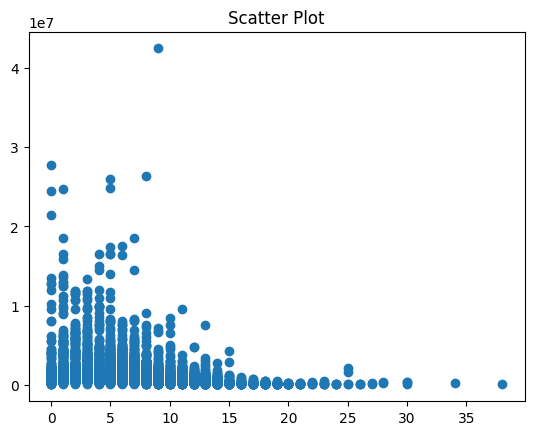

In [35]:

X=df["Age"]
Y= df["AskPrice"]
plt.scatter(X, Y)
plt.title("Scatter Plot")
plt.show()

In [36]:
df

,Brand,model,Age,kmDriven,Transmission,Owner,AskPrice,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol
0,Honda,City,23,98000.0,0,2,195000,False,False,True
1,Toyota,Innova,15,190000.0,0,2,375000,True,False,False
2,Volkswagen,VentoTest,14,77246.0,0,1,184999,True,False,False
3,Maruti Suzuki,Swift,7,83500.0,0,2,565000,True,False,False
4,Maruti Suzuki,Baleno,5,45000.0,1,1,685000,False,False,True
...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,10,105904.0,1,2,1040000,True,False,False
9578,Maruti Suzuki,Alto-800,4,55000.0,0,1,375000,False,True,False
9579,Maruti Suzuki,Ritz,11,92000.0,0,1,415000,True,False,False
9580,Hyundai,Verna,5,72000.0,1,1,855000,False,False,True


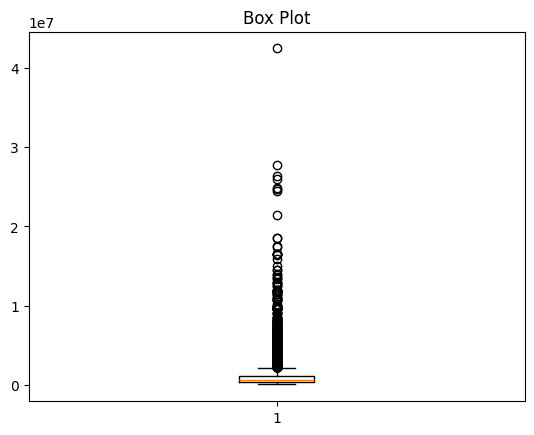

In [37]:
# Box plot
plt.boxplot(df["AskPrice"])
plt.title("Box Plot")
plt.show()

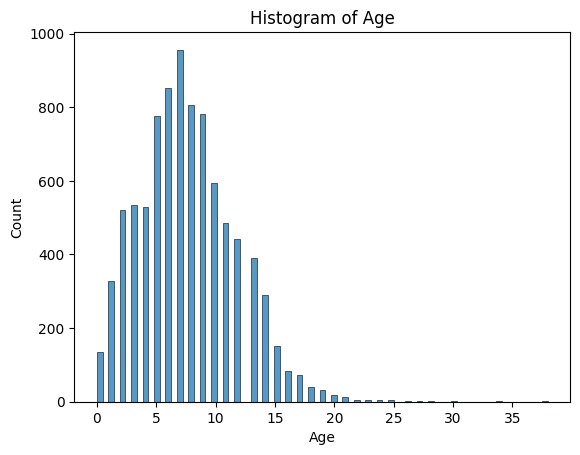

In [41]:
# Histogram (distplot/deprecated → use displot)
sns.histplot(df['Age'])
plt.title("Histogram of Age")
plt.show()